# Importing Required Libraries (The actual algorithm is self coded)

In [46]:
import pandas as pd 
import random
import numpy as np
import pprint 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
%matplotlib inline
# to generate your own dataset uncomment this code
# data = {'Feature1':[random.uniform(0, 6) for i in range(100)], 'Feature2':[random.uniform(0, 6) for i in range(100)], 'Feature3':[random.uniform(0, 6) for i in range(100)], 'Feature4':[random.uniform(0,6) for i in range(100)],'Output':[round(random.random()) for i in range(100)]} 
# df = pd.DataFrame(data) 

# Load Dataset

In [8]:
#load Dataset
df = pd.read_csv("data_d.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Exploratory Data Analysis and Visualisation

In [9]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [10]:
df.shape

(569, 33)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

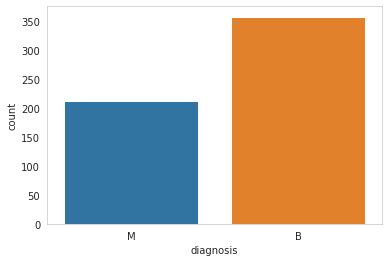

In [12]:
#countplot
ax = sns.countplot(df["diagnosis"],label="Count")      

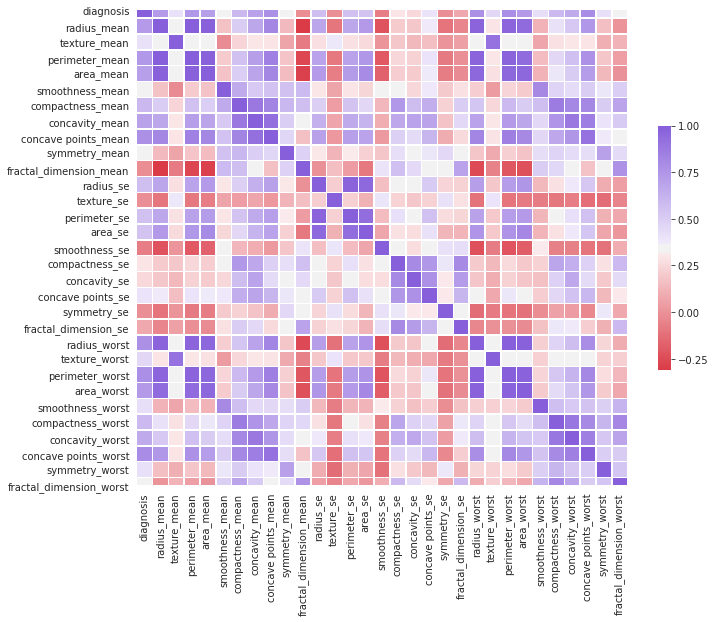

In [28]:
#Correlation matrix
corr = df.corr(method = 'pearson')
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(10, 275, as_cmap=True)

sns.heatmap(corr, cmap=cmap, square=True,
            linewidths=0.5, cbar_kws={"shrink": 0.5}, ax=ax)

# Data Preprocessing

In [14]:
#preprocessing
df = df.drop('id',axis=1)
df = df.drop('Unnamed: 32',axis=1)
df.columns.shape
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})


In [15]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Splitting Dataset to train test

In [44]:
d = df['diagnosis'].values
X = df.drop('diagnosis',axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X,d, test_size=0.30)

# Single Layer Perceptron Model

initial weight is 
[1.0, 0.4474421240801917, 0.08374638294173387, 0.26839262345334314, 0.9754653562278648, 0.09286767127062656, 0.45996525994305193, 0.3331346535545383, 0.41557217637721067, 0.8898408405106152, 0.9324618422963369, 0.24560636392501134, 0.8701804989467262, 0.08828415012494117, 0.2984084921003477, 0.7907830355762365, 0.5713857627316321, 0.6182034037083992, 0.06544889036032508, 0.7890685714871992, 0.6549250446384484, 0.38613826634098625, 0.25914976484189267, 0.39055190402005213, 0.7561256061540316, 0.17120611617252723, 0.6704897839108102, 0.15473930210151454, 0.5227635506795768, 0.38363058687003315, 0.9702216908908531]
epoch = 0   error = 59
epoch = 1   error = 34
epoch = 2   error = 23
epoch = 3   error = 20
epoch = 4   error = 16
epoch = 5   error = 17
epoch = 6   error = 18
epoch = 7   error = 13
epoch = 8   error = 10
epoch = 9   error = 7
epoch = 10   error = 10
epoch = 11   error = 13
epoch = 12   error = 6
epoch = 13   error = 5
epoch = 14   error = 8
epoch = 15   er

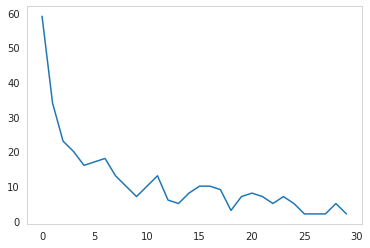

In [55]:
#perceptron
finals = []
from sklearn.metrics import accuracy_score
import random
class Perceptron:
    def __init__(self,input_size,epochs=100,alpha=0.02):
        self.epochs = epochs
        self.alpha = alpha
#         self.input_size = input_size
        weight = [random.random() for i in range(input_size+1)]
        weight[0] = 1.0
        self.weight = weight
        print("initial weight is ")
        print(weight)
#         self.weight = np.zeros(input_size+1)
    def activation(self,x):
        return 1 if x>=0 else 0
    def predict(self,x):
#         print(self.weight.T)
#         print(X)
       
        z = np.dot(self.weight,x)
#         print(z)
#         print(self.activation(z))
        a = self.activation(z)
        return a
   
    
    def learn(self,X,d):
#         final = []
        for j in range(self.epochs):
            sum = 0
            for i in range(d.shape[0]):
                x = np.insert(X[i],0,1)
                y = self.predict(x)
                e = (d[i] - y)
                self.weight = self.weight + self.alpha*e*x
                sum = sum + e
            finals.append(abs(sum))
            print("epoch = "+str(j)+"   error = "+str(abs(sum)))
#             print("Error" +str(sum))
#             print(self.weight)
        print("learning curve")
        plt.plot(range(self.epochs),finals)
                
if __name__ == '__main__':

    

    input_size = 30
    learning_rate = 0.02
    iterations = 30
    perceptron = Perceptron(input_size=30,alpha = learning_rate,epochs = iterations)
    perceptron.learn(X_train,y_train )


    print("The learned weight is ")
    print(perceptron.weight)

print("Learning Rate = "+str(learning_rate))
y_pred_train = []
for i in range(X_train.shape[0]):
    x= np.insert(X_train[i],0,1)
    y_pred_train.append(perceptron.predict(x))
  
    
print("Training data Accuracy = " +str(accuracy_score(y_train, y_pred_train)))
conftrain = confusion_matrix(y_train,y_pred_train)

y_pred_test = []
finals2 = []

for i in range(X_test.shape[0]):
    x= np.insert(X_test[i],0,1)
    y_pred_test.append(perceptron.predict(x))
#     print(y_pred_test)
# print("Hi");print(X_train)
# print(X_train)
# print(y_train)
# print(y_pred_train)

# print(y_pred)
print("Testing data Accuracy = " +str(accuracy_score(y_test, y_pred_test)))
conftest = confusion_matrix(y_test, y_pred_test)

# Evaluation Metrics

Confusion Matrix:Testing Data
Confusion Matrix:Training Data


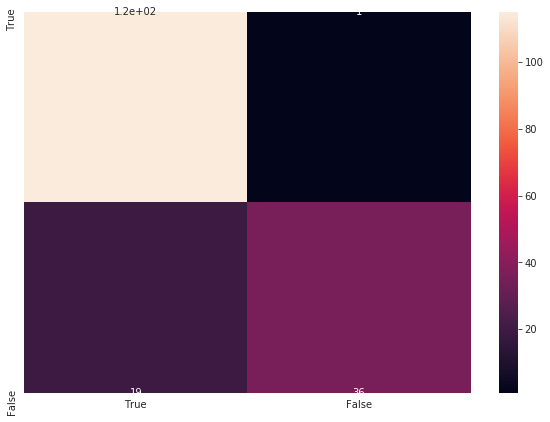

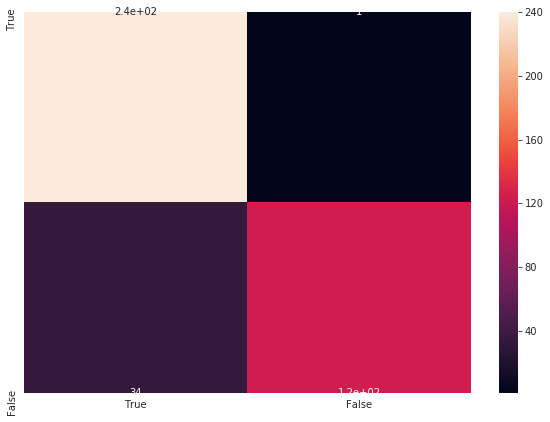

In [56]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
print("Confusion Matrix:Testing Data")
df_cm = pd.DataFrame(conftest, index = [i for i in ("True","False")],
                  columns = [i for i in ("True","False")])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

print("Confusion Matrix:Training Data")
df_cm = pd.DataFrame(conftrain, index = [i for i in ("True","False")],
                  columns = [i for i in ("True","False")])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

### Training Precision and Recall

In [59]:

precision = precision_score(y_train,y_pred_train)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_train,y_pred_train)
print('Recall: %f' % recall)

Precision: 0.991935
Recall: 0.783439


### Testing Precision and Recall

In [72]:

precision = precision_score(y_test,y_pred_test)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test,y_pred_test)
print('Recall: %f' % recall)

Precision: 0.972973
Recall: 0.654545


# Getting Top 5 Features

In [43]:
from sklearn.feature_selection import SelectKBest, chi2
X_new = SelectKBest(chi2, k=3).fit_transform(X,d)
X_new.shape
features_columns = df.columns

fs = SelectKBest(k=5)
fs.fit(X,d)
top_features = zip(fs.get_support(),features_columns)

print("The top 5 features are: ")
pp = pprint.PrettyPrinter(depth=4)
for i,j in top_features:
    if i==True:
        pp.pprint(j)

The top 5 features are: 
'texture_mean'
'concavity_mean'
'fractal_dimension_se'
'texture_worst'
'concavity_worst'


# Plot of Top 2 Features with the target value

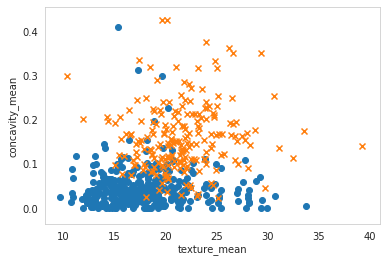

In [45]:
plt.scatter(df[ df['diagnosis']==0.0 ]['texture_mean'], df[ df['diagnosis']==0.0 ]['concavity_mean'], marker='o', Label=0)
plt.scatter(df[ df['diagnosis']==1.0 ]['texture_mean'], df[ df['diagnosis']==1.0 ]['concavity_mean'], marker='x', Label=1)
plt.xlabel('texture_mean')
plt.ylabel('concavity_mean')
plt.show()

# Final Remarks:

    1. Training data Accuracy = 0.9296482412060302
    2. Testing data Accuracy = 0.8830409356725146
    3. Top 5 Features: 

        *texture_mean
        *concavity_mean
        *fractal_dimension_se
        *texture_worst
        *concavity_worst

* With the Single layer perceptron algorithm, we got the above results, the results can be improved using a MultiLayerPerceptron.
* The accuracy obtained using our code is almost in sync with any of the standard libraries like SKlearn, Tensorflow etc.

# Paper Referred

Link: https://ieeexplore.ieee.org/abstract/document/8819775